<a href="https://colab.research.google.com/github/erenonaran/deeplearning/blob/main/02_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
from sklearn.datasets import make_circles

#Toy dataset for learning fundamentals of neural networks

n_samples = 1000
X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)
print(X.shape)
print(y.shape)

(1000, 2)
(1000,)


In [ ]:
import pandas as pd 

#For each sample of the dataset 2 features corresponds to 1 label

data = pd.DataFrame({"x1":X[:,0],"x2":X[:,1],"label":y})
data

,x1,x2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


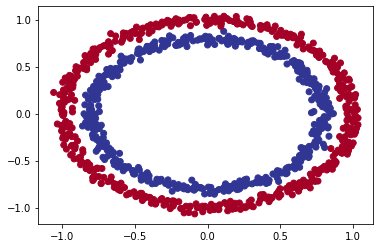

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [ ]:
import torch 

#Numpy arrays should be converted into torch tensors
print(f"X type: {type(X)}\nX datatype: {X.dtype}")
print(f"y type: {type(y)}\ny datatype: {y.dtype}")

X_tensor = torch.from_numpy(X).type(torch.float32)
y_tensor = torch.from_numpy(y).type(torch.float32)

print(f"X_tensor type: {type(X_tensor)}\nX_tensor datatype: {X_tensor.dtype}")
print(f"y_tensor type: {type(y_tensor)}\ny_tensor datatype: {y_tensor.dtype}")

X type: <class 'numpy.ndarray'>
X datatype: float64
y type: <class 'numpy.ndarray'>
y datatype: int64
X_tensor type: <class 'torch.Tensor'>
X_tensor datatype: torch.float32
y_tensor type: <class 'torch.Tensor'>
y_tensor datatype: torch.float32


In [ ]:
#Data splitting for training data and testing data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([800, 2])
torch.Size([200, 2])
torch.Size([800])
torch.Size([200])


In [ ]:
#Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
#Constructing a model
import torch
from torch import nn

class BinaryClassification(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
                              nn.Linear(in_features=2,out_features=5),
                              nn.Linear(in_features=5 ,out_features=1)
                              )
    
  def forward(self,x):
    return self.layers(x)

model_0 = BinaryClassification()
print(next(model_0.parameters()).device)
model_0.to(device)
print(next(model_0.parameters()).device)

cpu
cuda:0


In [ ]:
model_0.state_dict()

OrderedDict([('layers.0.weight', tensor([[ 0.5332,  0.6038],
                      [-0.4681,  0.6360],
                      [ 0.2916,  0.0117],
                      [ 0.2386,  0.0970],
                      [-0.0999, -0.0023]], device='cuda:0')),
             ('layers.0.bias',
              tensor([ 0.0880, -0.5444,  0.6871,  0.2048,  0.2091], device='cuda:0')),
             ('layers.1.weight',
              tensor([[-0.3010, -0.0040, -0.1159,  0.2568,  0.0910]], device='cuda:0')),
             ('layers.1.bias', tensor([0.3439], device='cuda:0'))])

In [ ]:
loss_func = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

def acc(y_pred, y_true):
  correct = torch.eq(y_pred, y_true).sum().item()
  ratio = correct * 100 / len(y_true)
  return ratio

In [ ]:
#Training model

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test =  y_test.to(device) 

epoch = 1000

for epoch in range(epoch):

  model_0.train()
  y_train_pred = model_0(X_train).squeeze()
  loss = loss_func(y_train_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    y_test_pred = model_0(X_test).squeeze()
    y_test_pred_label = torch.round(torch.sigmoid(y_test_pred))
    test_acc = acc(y_test_pred_label, y_test)
    test_loss = loss_func(y_test_pred, y_test)
    
  if epoch % 100 == 0:
    print(f"Epoch: {epoch},Loss: {loss},Test loss: {test_loss}, Test Accuracy {test_acc}") 
    

Epoch: 0,Loss: 0.7088863849639893,Test loss: 0.7008825540542603, Test Accuracy 50.0
Epoch: 100,Loss: 0.6939252018928528,Test loss: 0.6925463676452637, Test Accuracy 49.5
Epoch: 200,Loss: 0.6932108998298645,Test loss: 0.6935991644859314, Test Accuracy 53.0
Epoch: 300,Loss: 0.6930416822433472,Test loss: 0.694174587726593, Test Accuracy 47.5
Epoch: 400,Loss: 0.6929972767829895,Test loss: 0.6944485306739807, Test Accuracy 47.5
Epoch: 500,Loss: 0.692984938621521,Test loss: 0.6945735812187195, Test Accuracy 47.5
Epoch: 600,Loss: 0.6929814219474792,Test loss: 0.6946302652359009, Test Accuracy 46.5
Epoch: 700,Loss: 0.6929803490638733,Test loss: 0.6946561932563782, Test Accuracy 46.0
Epoch: 800,Loss: 0.6929799318313599,Test loss: 0.6946682333946228, Test Accuracy 45.0
Epoch: 900,Loss: 0.6929798722267151,Test loss: 0.6946738958358765, Test Accuracy 45.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y,device=device):

  model.to("cpu")
  X ,y = X.to("cpu"), y.to("cpu")


  min_x1, max_x1 = X[:,0].min()-0.1, X[:,0].max()+0.1
  min_x2, max_x2 = X[:,1].min()-0.1, X[:,1].max()+0.1

  xx, yy = np.meshgrid(np.linspace(min_x1,max_x1,101),np.linspace(min_x2,max_x2,101))
  grid = np.concatenate((np.expand_dims(xx,2), np.expand_dims(yy,2)),2)
  grid_tensor = torch.from_numpy(grid).float()
  
  model.eval()
  with torch.inference_mode():
    zz_logits = model(grid_tensor)
  zz_pred = torch.round(torch.sigmoid(zz_logits)).squeeze()
  zz = zz_pred.detach().numpy()

  plt.contourf(xx, yy, zz, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

  model.to(device)
  X ,y = X.to(device), y.to(device)

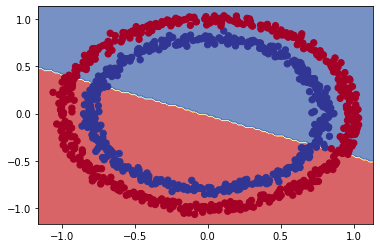

In [ ]:
plot_decision_boundary(model_0,X_tensor, y_tensor)

In [ ]:
class BinaryClassification2(nn.Module):

  def __init__(self,neuron_num_tuple):
    super().__init__()
    self.neuron_num_tuple = neuron_num_tuple
    self.layer_num = len(neuron_num_tuple)-1
    self.layers = nn.Sequential(*[nn.Linear(self.neuron_num_tuple[i],self.neuron_num_tuple[i+1]) for i in range(self.layer_num)])

  def forward(self,x):
    return self.layers(x)

In [ ]:
model_1 = BinaryClassification2((2,8,8,1))
model_1.to(device)

loss_f = nn.BCEWithLogitsLoss()
optim = torch.optim.SGD(model_1.parameters(),lr=0.01)

In [ ]:

epoch1 = 1000
for epoch1 in range(epoch1):

  model_1.train()
  y_logit = model_1(X_train).squeeze()
  loss = loss_f(y_logit,y_train)
  
  optim.zero_grad()
  loss.backward()
  optim.step()

  model_1.eval()
  with torch.inference_mode():
    y_logit_test = model_1(X_test).squeeze()
    loss_test = loss_f(y_logit_test,y_test)
    accuracy = acc(torch.round(torch.sigmoid(y_logit_test)),y_test)

  if epoch1 % 100 == 0:
    print(f"Epoch: {epoch1},Training loss: {loss},Test loss: {loss_test},Accuracy: {accuracy}")

Epoch: 0,Training loss: 0.6953381299972534,Test loss: 0.6964981555938721,Accuracy: 44.5
Epoch: 100,Training loss: 0.6938236951828003,Test loss: 0.6952371597290039,Accuracy: 49.0
Epoch: 200,Training loss: 0.693491518497467,Test loss: 0.695124089717865,Accuracy: 48.5
Epoch: 300,Training loss: 0.6933677792549133,Test loss: 0.6951778531074524,Accuracy: 49.0
Epoch: 400,Training loss: 0.6932947635650635,Test loss: 0.6952427625656128,Accuracy: 49.0
Epoch: 500,Training loss: 0.6932420134544373,Test loss: 0.6952942609786987,Accuracy: 48.0
Epoch: 600,Training loss: 0.6932013034820557,Test loss: 0.695330023765564,Accuracy: 49.0
Epoch: 700,Training loss: 0.6931687593460083,Test loss: 0.6953516006469727,Accuracy: 48.0
Epoch: 800,Training loss: 0.6931423544883728,Test loss: 0.6953616142272949,Accuracy: 48.0
Epoch: 900,Training loss: 0.693120539188385,Test loss: 0.6953620910644531,Accuracy: 47.5


cpu


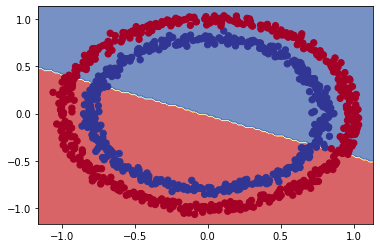

In [ ]:
plot_decision_boundary(model_0,X_tensor, y_tensor)


cpu


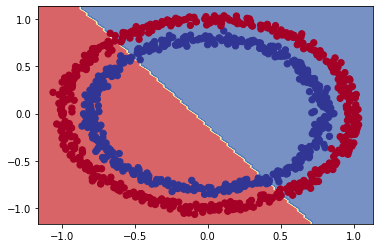

In [ ]:
plot_decision_boundary(model_1,X_tensor, y_tensor)

In [ ]:
class NonlinearModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(nn.Linear(2,16),
                                nn.ReLU(),
                                nn.Linear(16,1))

  def forward(self,x):
    return self.layers(x)

In [ ]:
model_2 = NonlinearModel()
model_2.to(device)
X_train,X_test,y_train,y_test = X_train.to(device),X_test.to(device),y_train.to(device),y_test.to(device)

loss_function = nn.BCEWithLogitsLoss()
optimizer_function = torch.optim.SGD(params=model_2.parameters(),lr=0.1)

In [ ]:
epoch2 = 1000

for epoch in range(epoch2):
  
  model_2.train()
  y_logit_2 = model_2(X_train).squeeze()
  loss_2 = loss_function(y_logit_2,y_train)
  optimizer_function.zero_grad()
  loss_2.backward()
  optimizer_function.step()

  model_2.eval()
  with torch.inference_mode():
    y_logit_test_2 = model_2(X_test).squeeze()
    loss_test_2 = loss_function(y_logit_test_2,y_test)
    acc_2 = acc(torch.round(torch.sigmoid(y_logit_test_2)),y_test)

  if epoch % 100 == 0:
    print(f"Epoch {epoch}|Loss {loss_2}|Test Loss {loss_test_2}|Accuracy {acc_2}")

Epoch 0|Loss 0.05174378678202629|Test Loss 0.08130688220262527|Accuracy 100.0
Epoch 100|Loss 0.04952648654580116|Test Loss 0.07864876836538315|Accuracy 100.0
Epoch 200|Loss 0.04747603461146355|Test Loss 0.07616063207387924|Accuracy 100.0
Epoch 300|Loss 0.04557222127914429|Test Loss 0.07385451346635818|Accuracy 100.0
Epoch 400|Loss 0.04379882290959358|Test Loss 0.0716787725687027|Accuracy 100.0
Epoch 500|Loss 0.042151160538196564|Test Loss 0.06963399052619934|Accuracy 100.0
Epoch 600|Loss 0.040613431483507156|Test Loss 0.0677318349480629|Accuracy 100.0
Epoch 700|Loss 0.039178915321826935|Test Loss 0.06591293960809708|Accuracy 100.0
Epoch 800|Loss 0.03783702105283737|Test Loss 0.0641978532075882|Accuracy 100.0
Epoch 900|Loss 0.036577533930540085|Test Loss 0.06256044656038284|Accuracy 100.0


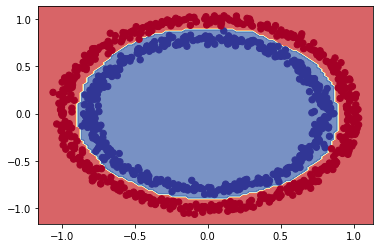

In [ ]:
plot_decision_boundary(model=model_2,X=X_tensor,y=y_tensor)

In [ ]:
#Experiment on different colab